In [1]:
import pandas as pd
from tslearn.clustering import TimeSeriesKMeans
import numpy as np
import matplotlib.pyplot as plt
from tslearn.preprocessing import TimeSeriesResampler
import sys

sys.path.append('../')
from helpers import plot_ts_cluster_results

c:\Users\Shani\miniconda3\envs\forecasting\lib\site-packages\tslearn\bases\bases.py:15: UserWarning: h5py not installed, hdf5 features will not be supported.
Install h5py to use hdf5 features: http://docs.h5py.org/
  warn(h5py_msg)
Importing plotly failed. Interactive plots will not work.


In [2]:
df = pd.read_parquet("../creds and datasets/sample_10_000_preprocessed.parquet")

In [3]:
df.shape

(5790000, 2)

In [4]:
df.columns = ['uid','usage']

In [5]:
df.head()

,uid,usage
2020-06-01,2860,0
2020-06-01,5126,0
2020-06-01,9047,0
2020-06-01,9900,114
2020-06-01,2406,0


In [6]:
train = df.pivot_table(index='uid',columns=df.index,values='usage')
train = train.values.reshape(10_000,-1,1)
np.random.shuffle(train)
train.shape

(10000, 579, 1)

In [7]:
N = 100
sample_data = train[0:N]
del df
del train

In [28]:
model = TimeSeriesKMeans(n_clusters=4, metric="dtw",max_iter=10, random_state=1997,n_jobs=-1)

In [29]:
%time model.fit(sample_data)

CPU times: total: 59.9 s
Wall time: 44.3 s


TimeSeriesKMeans(max_iter=10, metric='dtw', n_clusters=4, n_jobs=-1,
                 random_state=1997)

In [36]:
labels = model.predict(sample_data)

In [37]:
results = pd.DataFrame(
    np.hstack(
        (   
            sample_data.reshape(N,-1),
            labels.reshape(N,-1)
            
        )
            )
    )

In [38]:
results.rename(columns={579:"cluster"},inplace=True)

In [41]:
results.cluster.value_counts()

0    62
3    23
2    14
1     1
Name: cluster, dtype: int64

In [43]:
n = 6
u00 = results.query("cluster==0")[range(579)].sample(n).values
u01 = results.query("cluster==2")[range(579)].sample(n).values
u02 = results.query("cluster==3")[range(579)].sample(n).values

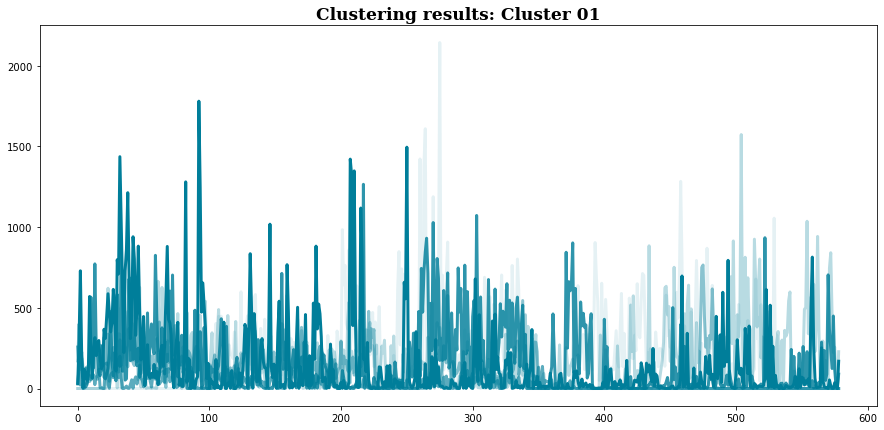

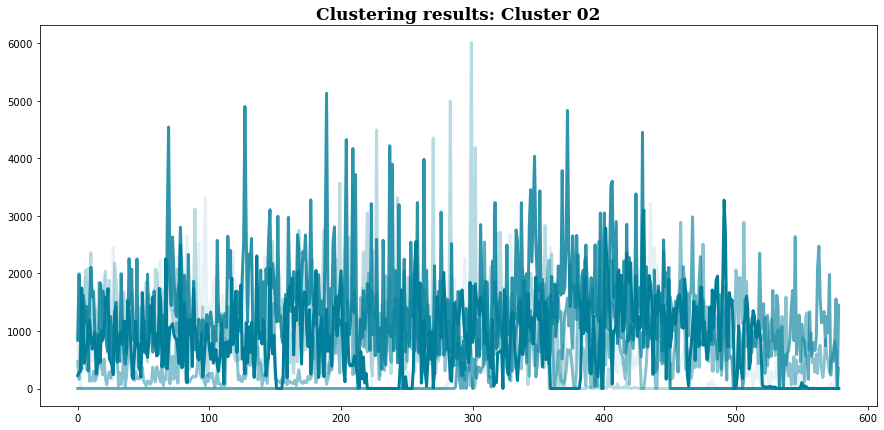

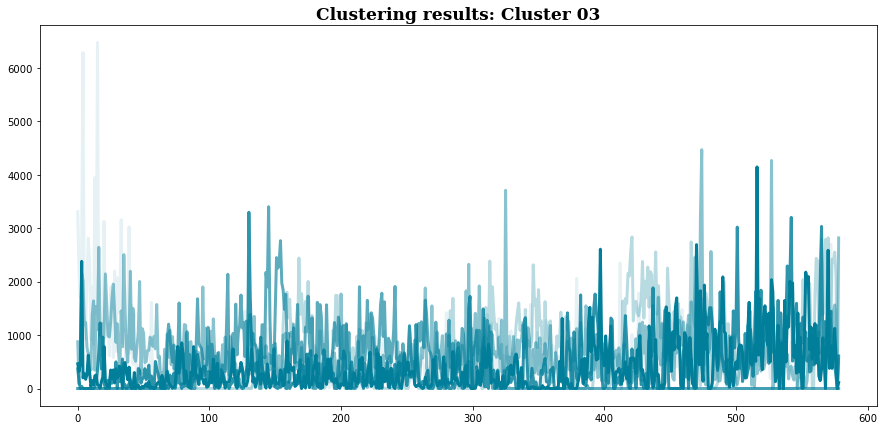

In [45]:
for i,g in enumerate([u00,u01,u02]):
    plot_ts_cluster_results(g,i,n=n,plot_mean=False)